<a href="https://colab.research.google.com/github/thumbzzero/2022-cse-hackathon/blob/main/2022_hack_data_%EC%9D%B4%EC%83%81%EC%B9%98%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 해커톤 은행나무 DATA



In [10]:
from datascience import *
import numpy as np
import pandas as pd

In [6]:
allTree = Table.read_table('대구광역시 은행나무 좌표.csv')
allTree.show(3)

시작,시작위도,시작경도,끝,끝위도,끝경도,밀도,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
대곡역,35.8095,128.513,한우아파트,35.8085,128.508,156.098,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
한우아파트,35.8085,128.508,"화원,옥포Ic네거리",35.7921,128.476,157.353,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
화원옥포Ic네거리,35.7921,128.476,88올림픽고속도로,35.7895,128.465,154,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


현재 : 공공데이터포털 대구광역시_음향신호기_잔여시간표시기_벤치_가로수 설치현황_20210826.csv 에서 은행나무 데이터의 주소, 거리(시작위치~끝위치)를 경도, 위도 좌표로 변환한 상태

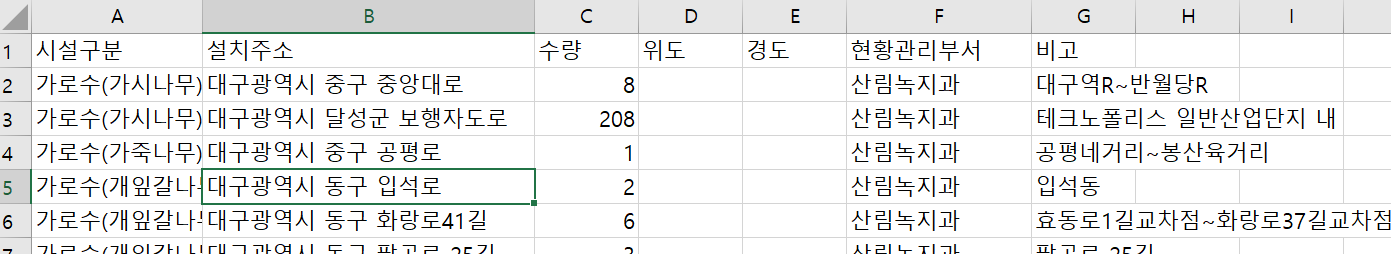

좌표를 naver map API를 통해 지도에 찍기 전 이상치 확인

In [47]:
latlon = allTree.drop("시작").drop("끝").drop("밀도")
latlon.show(3)

시작위도,시작경도,끝위도,끝경도,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
35.8095,128.513,35.8085,128.508,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
35.8085,128.508,35.7921,128.476,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
35.7921,128.476,35.7895,128.465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [49]:
trydata= latlon.drop(np.arange(4,23))
trydata.show(3)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:1340: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i not in exclude and c not in exclude])


시작위도,시작경도,끝위도,끝경도
35.8095,128.513,35.8085,128.508
35.8085,128.508,35.7921,128.476
35.7921,128.476,35.7895,128.465


In [50]:
startD = trydata.drop("끝위도").drop("끝경도")

In [51]:
goalD = trydata.drop("시작위도").drop("시작경도")
goalD.show(3)

끝위도,끝경도
35.8085,128.508
35.7921,128.476
35.7895,128.465


In [55]:

import matplotlib.pyplot as plots


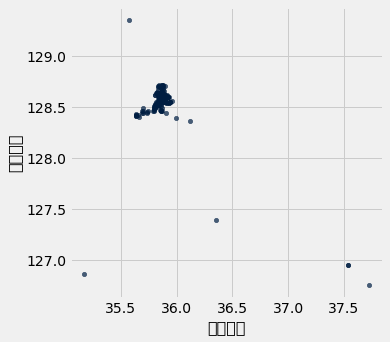

In [56]:
visual = startD.scatter("시작위도","시작경도") #이상치의 경우 한곳에 몰리지 않음

시작 위치가 위도 128.5근처에 몰려있어 이부분이 우리가 변환한 대구 위치임을 알 수 있음. 시작 데이터에서 위도가 129 이상, 127 이상을 지우면 온전한 대구 가로수 데이터만 얻을 수 있다. 

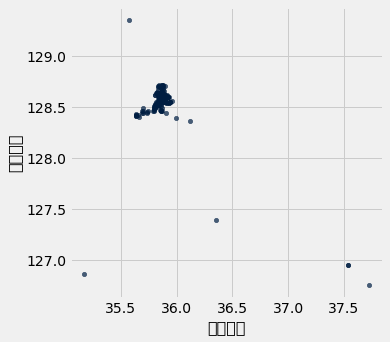

In [57]:
visual = startD.scatter("시작위도","시작경도") #이상치의 경우 한곳에 몰리지 않음

대구의 경우는 35.5~36.0 이내 일텐데 그 외 지역이 들어있음. 이 경우 가로수 데이터에서 위 범위 이상의 값을 제거해야함

# 결론

- 대구 가로수 데이터를 데이터베이스에 업데이트하기전에 마지막으로 이상치, 결측치를 확인하였다. scatter()로 visualiztion 해본 결과 대구 주소를 Google API로 변환하였음에도 대구 지역이 아닌 다른 위치로 저장된 것을 확인하였다.